In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,InputLayer,Conv2DTranspose
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import optimizers
from keras import losses
from keras import models
import os

In [4]:
from keras.models import load_model
encoder=load_model("encoder_face.h5")
decoder=load_model("decoder_face.h5")

W0811 03:19:01.535641 21856 deprecation_wrapper.py:119] From C:\Users\noufal.samsudin\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 03:19:01.555587 21856 deprecation_wrapper.py:119] From C:\Users\noufal.samsudin\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 03:19:01.567555 21856 deprecation_wrapper.py:119] From C:\Users\noufal.samsudin\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 03:19:01.567555 21856 deprecation_wrapper.py:119] From C:\Users\noufal.samsudin\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placehol

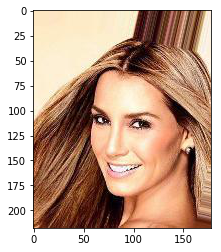

In [6]:
df=pd.read_csv("./celeba-dataset/list_attr_celeba.csv").head(10000)
fnames=list(df.image_id.unique())
fnames[0]
image = load_img("./celeba-dataset/img_align_celeba/img_align_celeba/"+fnames[0])
plt.imshow(image)

In [7]:
np.array(image).shape

(218, 178, 3)

In [9]:
from skimage.transform import resize
# bottle_resized = resize(bottle, (140, 54), anti_aliasing=True)
def pre_process_image(image):
#     if image.size != (28, height):  
#     image=resize(image, (218,178, 3), anti_aliasing=True)
    face_width = face_height = 50
#     print(image.shape)
    j = (image.shape[0] - face_width) // 2
    i = (image.shape[1] - face_height) // 2
    image = image[j: j + face_width, i:i + face_height]
    #         image = image.resize([width, height], Image.BILINEAR)
    return resize(image, IMAGE_SIZE+(3,), anti_aliasing=True)

def nopreprocess(x):
    return x

batch_size = 64
IMAGE_SIZE=(64, 64)
train_datagen = ImageDataGenerator(rescale=1/255,preprocessing_function=pre_process_image)

train_generator = train_datagen.flow_from_dataframe(df,
        './celeba-dataset/img_align_celeba/img_align_celeba/',
        target_size=IMAGE_SIZE, x_col='image_id',
        batch_size=32, class_mode='input')

validation_datagen = ImageDataGenerator(rescale=1/255,preprocessing_function=pre_process_image)
validation_generator = validation_datagen.flow_from_dataframe(df.tail(20),
        './celeba-dataset/img_align_celeba/img_align_celeba/',
        target_size=IMAGE_SIZE, x_col='image_id',
        batch_size=32, class_mode='input')

Found 10000 validated image filenames.
Found 20 validated image filenames.


C:\Users\noufal.samsudin\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


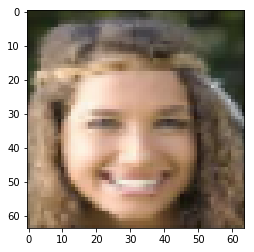

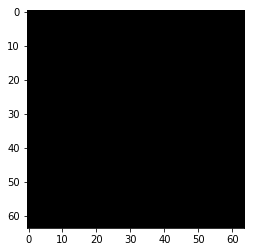

In [10]:
plt.imshow(train_generator[0][0][1].astype(np.float))
plt.show()
plt.imshow(train_generator[0][0][1].astype(np.uint8))
plt.show()

In [ ]:
# dropout_rate = 0.5
# DIMEN = 64
# kernel_size = ( 4 , 4 )

# NEURAL_SCHEMA = [

#     Conv2D( 32 , input_shape=( DIMEN , DIMEN , 3 ) , kernel_size=kernel_size , strides=1,activation="relu"),
#     Dropout( dropout_rate ) ,
#     Conv2D( 64, kernel_size=kernel_size, strides=1, activation="relu"),
#     Dropout(dropout_rate),
#     Conv2D( 128, kernel_size=kernel_size, strides=1, activation="relu") ,
#     Dropout(dropout_rate),
#     Conv2D( 256, kernel_size=kernel_size, strides=1, activation="relu"),
#     Dropout(dropout_rate),
#     Flatten(),
#     Reshape((52,52,256)),
#     Conv2DTranspose( 128, kernel_size=kernel_size, strides=1, activation="relu"),
#     Dropout(dropout_rate),
#     Conv2DTranspose( 64, kernel_size=kernel_size, strides=1, activation="relu"),
#     Dropout(dropout_rate),
#     Conv2DTranspose( 32, kernel_size=kernel_size, strides=1, activation="relu"),
#     Dropout(dropout_rate),
#     Conv2DTranspose( 3, kernel_size=kernel_size, strides=1, activation="tanh" ),

# ]

# model = Sequential( NEURAL_SCHEMA )

# model.summary()

In [ ]:
#works
dropout_rate = 0.3
DIMEN = 64
kernel_size = ( 4 , 4 )

NEURAL_SCHEMA = [

    Conv2D( 32 , input_shape=( DIMEN , DIMEN , 3 ) , kernel_size=kernel_size , strides=1,activation="relu"),
    Dropout( dropout_rate ) ,
    BatchNormalization(),
    Conv2D( 64, kernel_size=kernel_size, strides=1, activation="relu"),
    Dropout(dropout_rate),
    Conv2D( 128, kernel_size=kernel_size, strides=1, activation="relu") ,
    Dropout(dropout_rate),
    Conv2D( 256, kernel_size=kernel_size, strides=1, activation="relu"),
    Dropout(dropout_rate),
    Flatten(),
    Reshape((52,52,256)),
    Conv2DTranspose( 128, kernel_size=kernel_size, strides=1, activation="relu"),
#     Dropout(dropout_rate),
    BatchNormalization(),
    Conv2DTranspose( 64, kernel_size=kernel_size, strides=1, activation="relu"),
#     Dropout(dropout_rate),
    BatchNormalization(),
    Conv2DTranspose( 32, kernel_size=kernel_size, strides=1, activation="relu"),
#     Dropout(dropout_rate),
    BatchNormalization(),
    Conv2D( 32, kernel_size=(3,3), strides=1, activation="relu",padding='same'),
    Conv2DTranspose( 3, kernel_size=kernel_size, strides=1, activation="tanh" ),

]

model = Sequential( NEURAL_SCHEMA )
# 
model.summary()

In [ ]:
# #model testing 2
# dropout_rate = 0.3
# DIMEN = 64
# kernel_size = ( 3 , 3 )

# NEURAL_SCHEMA = [

#     Conv2D( 32 , input_shape=( DIMEN , DIMEN , 3 ) , kernel_size=kernel_size , strides=1,activation="relu",padding='same'),
# #     Dropout( dropout_rate ) ,
#     BatchNormalization(),
#     MaxPooling2D((2,2),padding='same'),
#     Conv2D( 64, kernel_size=kernel_size, strides=1, activation="relu",padding='same'),
#     MaxPooling2D((2,2),padding='same'),
#     Conv2D( 128, kernel_size=kernel_size, strides=1, activation="relu",padding='same'),
#     MaxPooling2D((2,2),padding='same'),
#     Conv2D( 256, kernel_size=kernel_size, strides=1, activation="relu",padding='same'),
#     MaxPooling2D((2,2),padding='same'),
#     Flatten(name='flatten'),
#     Reshape((4,4,256)),
#     Conv2DTranspose( 128, kernel_size=kernel_size, strides=2, activation="relu",padding='same'),
#     BatchNormalization(),
#     Conv2DTranspose( 64, kernel_size=kernel_size, strides=2, activation="relu",padding='same'),
# # #     Dropout(dropout_rate),
#     BatchNormalization(),
#     Conv2DTranspose( 32, kernel_size=kernel_size, strides=2, activation="relu",padding='same'),
# # #     Dropout(dropout_rate),
#     BatchNormalization(),
#     Conv2D( 32, kernel_size=(3,3), strides=1, activation="relu",padding='same'),
#     Conv2DTranspose( 3, kernel_size=kernel_size, strides=2, activation="tanh" ,padding='same'),

# ]

# model = Sequential( NEURAL_SCHEMA )
# # 
# model.summary()

In [ ]:
dropout_rate = 0.3
DIMEN = 64
kernel_size = ( 3 , 3 )

# NEURAL_SCHEMA = [

#     Conv2D( 32 , input_shape=( DIMEN , DIMEN , 3 ) , kernel_size=kernel_size , strides=1,activation="relu"),
#     Dropout( dropout_rate ) ,
#     BatchNormalization(),
#     Conv2D( 64, kernel_size=kernel_size, strides=1, activation="relu"),
#     Dropout(dropout_rate),
#     Conv2D( 128, kernel_size=kernel_size, strides=1, activation="relu") ,
#     Dropout(dropout_rate),
#     Conv2D( 256, kernel_size=kernel_size, strides=1, activation="relu"),
#     Dropout(dropout_rate),
#     Flatten(),
#     Reshape((52,52,256)),
#     Conv2DTranspose( 128, kernel_size=kernel_size, strides=1, activation="relu"),
# #     Dropout(dropout_rate),
#     BatchNormalization(),
#     Conv2DTranspose( 64, kernel_size=kernel_size, strides=1, activation="relu"),
# #     Dropout(dropout_rate),
#     BatchNormalization(),
#     Conv2DTranspose( 32, kernel_size=kernel_size, strides=1, activation="relu"),
# #     Dropout(dropout_rate),
#     BatchNormalization(),
#     Conv2DTranspose( 3, kernel_size=kernel_size, strides=1, activation="tanh" ),

# ]

# model = Sequential( NEURAL_SCHEMA )

# encoder=Sequential()
# encoder.add(Conv2D( 64 , input_shape=( DIMEN , DIMEN , 3 ) , kernel_size=(3,3) , strides=1,activation="relu",padding='same'))
# encoder.add(MaxPooling2D( (2,2) ,padding='same'))
# encoder.add(Conv2D( 32 , kernel_size=(3,3) , strides=1,activation="relu",padding='same'))
# encoder.add(MaxPooling2D( (2,2) ,padding='same'))
# encoder.add(Conv2D( 16 , kernel_size=(3,3) , strides=1,activation="relu",padding='same'))
# encoder.add(MaxPooling2D( (2,2) ,padding='same'))
# encoder.add(Conv2D( 8 , kernel_size=(3,3) , strides=1,activation="relu",padding='same'))
# encoder.add(Flatten())
# encoder.summary()

In [ ]:
# decoder=Sequential()
# decoder.add(Dense(512,input_shape=(512,)))
# decoder.add(Reshape((8,8,8)))
# decoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
# decoder.add(UpSampling2D((2, 2)))
# decoder.add(Conv2D( 16 , kernel_size=(3,3) , strides=1,activation="relu",padding='same'))
# decoder.add(UpSampling2D((2, 2)))
# decoder.add(Conv2D( 32 , kernel_size=(3,3) , strides=1,activation="relu",padding='same'))
# decoder.add(UpSampling2D((2, 2)))
# decoder.add(Conv2D( 3 , kernel_size=(3,3) , strides=1,activation="relu",padding='same'))
# decoder.summary()

In [ ]:
# model=Sequential()
# for layer in encoder.layers:
#     model.add(layer)
# for layer in decoder.layers:
#     model.add(layer)
# model.compile(optimizer=optimizers.Adam(0.00001),
#     loss=losses.mean_squared_error,
#     metrics=['mae'])
# model.summary()

In [ ]:
encoder=Sequential()
for layer in model.layers[:10]:
    encoder.add(layer)
encoder.summary()

In [ ]:
from keras.layers import Input
encoded_input = Input(shape=(692224,))
deco=model.layers[10](encoded_input)
for layer in model.layers[11:]:
    deco=layer(deco)
decoder = Model(encoded_input, deco)
decoder.summary()

In [ ]:
model.compile(
    optimizer=optimizers.Adam(0.000001),
    loss=losses.mean_squared_error,
    metrics=['mae'],
)

In [ ]:
history=model.fit_generator(generator=train_generator, steps_per_epoch=train_generator.n, epochs=5, 
                    validation_data=validation_generator, validation_steps=validation_generator.n)

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_image=train_generator[0][0][30].astype(np.float).reshape(1,64,64,3)
plt.imshow(test_image.reshape(64, 64,3))
plt.show()
encoded_img=encoder.predict(test_image)
plt.imshow(encoded_img)
plt.show()
decoded_img=decoder.predict(encoded_img)
plt.imshow(decoded_img.reshape(64,64,3))
plt.show()
decoded_img2=model.predict(test_image)
plt.imshow(decoded_img2.reshape(64,64,3))
plt.show()

In [ ]:
test_image=train_generator[0][0][1].astype(np.float).reshape(1,64,64,3)
plt.imshow(test_image.reshape(64, 64,3))
plt.show()
encoded_img=encoder.predict(test_image)
plt.imshow(encoded_img)
plt.show()
decoded_img=decoder.predict(encoded_img)
plt.imshow(decoded_img.reshape(64,64,3))
plt.show()
decoded_img2=model.predict(test_image)
plt.imshow(decoded_img2.reshape(64,64,3))
plt.show()

In [ ]:
model.save("model.h5")
encoder.save("encoder_face.h5")
decoder.save("decoder_face.h5")

<a href="./encoder_face.h5"> Encoder </a>

<a href="./decoder_face.h5"> Decoder </a>

<a href="./model.h5"> model </a>

In [ ]:

# plt.savefig("fig1.png")
import scipy.misc
scipy.misc.imsave('fig1.jpg', train_generator[0][0][30].astype(np.float).reshape(64,64,3))

In [ ]:
# plt.imshow(train_generator[0][0][1].astype(np.float).reshape(64,64,3))
# plt.savefig("fig2.png")
scipy.misc.imsave('fig2.jpg', train_generator[0][0][1].astype(np.float).reshape(64,64,3))

In [ ]:
os.listdir()

<a href="./fig1.jpg"> fig1 </a>

<a href="./fig2.jpg"> fig2 </a>

In [11]:
import numpy as np
def interpolate_points(p1, p2, n_steps=10):
	# interpolate ratios between the points
	ratios = np.linspace(0, 1, num=n_steps)
	# linear interpolate vectors
	vectors = list()
	for ratio in ratios:
		v = (1.0 - ratio) * p1 + ratio * p2
		vectors.append(v)
	return np.asarray(vectors)

In [12]:
# example of interpolating 
from numpy import asarray
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from numpy import arccos
from numpy import clip
from numpy import dot
from numpy import sin
from numpy import linspace
from numpy.linalg import norm
from keras.models import load_model
# spherical linear interpolation (slerp)
def slerp(val, low, high):
	omega = arccos(clip(dot(low/norm(low), high/norm(high)), -1, 1))
	so = sin(omega)
	if so == 0:
		# L'Hopital's rule/LERP
		return (1.0-val) * low + val * high
	return sin((1.0-val)*omega) / so * low + sin(val*omega) / so * high

# uniform interpolation between two points in latent space
def interpolate_points_slerp(p1, p2, n_steps=10):
	# interpolate ratios between the points
	ratios = linspace(0, 1, num=n_steps)
	# linear interpolate vectors
	vectors = list()
	for ratio in ratios:
		v = slerp(ratio, p1, p2)
		vectors.append(v)
	return asarray(vectors)

W0811 03:23:30.020805 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:30.080649 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:30.155445 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:30.203320 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:30.219275 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:30.343979 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:30.442678 21856 image.py:648] Clipping input data to the valid range for ims

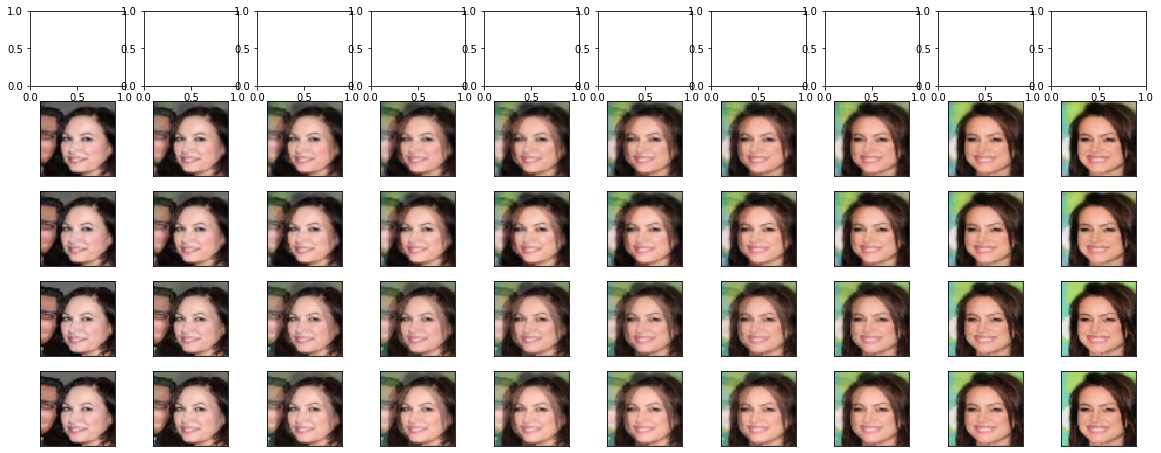

In [13]:
test_image1=train_generator[0][0][13].astype(np.float).reshape(1,64,64,3)
test_image2=train_generator[0][0][22].astype(np.float).reshape(1,64,64,3)
encoded_img1=encoder.predict(test_image1)
encoded_img2=encoder.predict(test_image2)
interpolated_images=interpolate_points(encoded_img1.flatten(),encoded_img2.flatten())
interpolated_orig_images=interpolate_points(test_image1.flatten(),test_image2.flatten())
interpolated_slerp_images=interpolate_points_slerp(encoded_img1.flatten(),encoded_img2.flatten())
interpolated_slerp_orig_images=interpolate_points_slerp(test_image1.flatten(),test_image2.flatten())

interpolated_images.shape
num_images = 10
np.random.seed(42)
plt.figure(figsize=(20, 8))

for i, image_idx in enumerate(interpolated_images):
    
    ax = plt.subplot(5, num_images, i + 1)
#     plt.imshow(interpolated_images[i].reshape(16, 8))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(5, num_images,num_images+ i + 1)
    plt.imshow(decoder.predict(interpolated_images[i].reshape(1,692224)).reshape(64,64,3))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(5, num_images,2*num_images+ i + 1)
    plt.imshow(decoder.predict(interpolated_slerp_images[i].reshape(1,692224)).reshape(64,64,3))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(5, num_images,3*num_images+ i + 1)
    plt.imshow(interpolated_orig_images[i].reshape(64,64,3))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(5, num_images,4*num_images+ i + 1)
    plt.imshow(interpolated_slerp_orig_images[i].reshape(64,64,3))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

W0811 03:23:41.939592 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:41.988462 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:42.121140 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:42.216849 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:42.233835 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:42.359467 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:42.378456 21856 image.py:648] Clipping input data to the valid range for ims

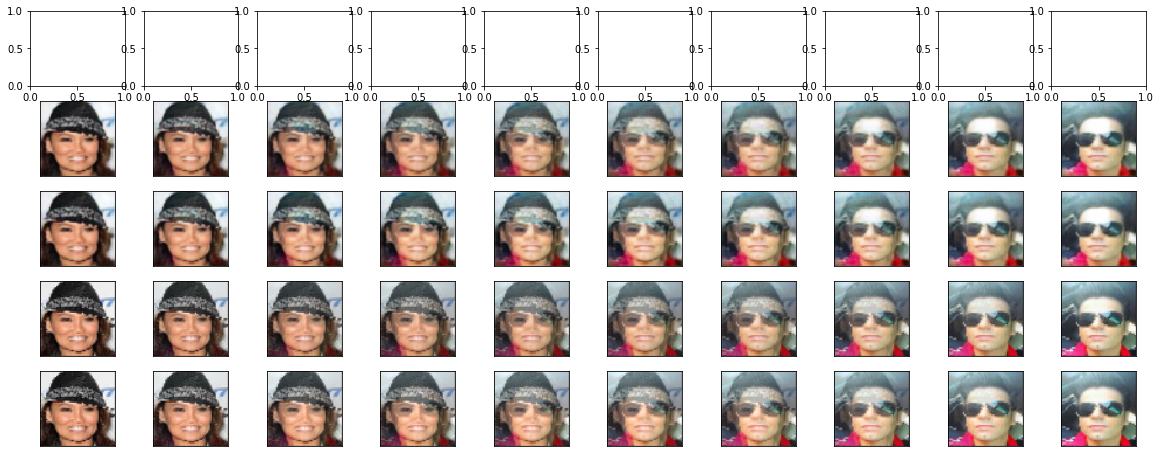

In [14]:
test_image1=train_generator[22][0][1].astype(np.float).reshape(1,64,64,3)
test_image2=train_generator[30][0][12].astype(np.float).reshape(1,64,64,3)
encoded_img1=encoder.predict(test_image1)
encoded_img2=encoder.predict(test_image2)
interpolated_images=interpolate_points(encoded_img1.flatten(),encoded_img2.flatten())
interpolated_orig_images=interpolate_points(test_image1.flatten(),test_image2.flatten())
interpolated_slerp_images=interpolate_points_slerp(encoded_img1.flatten(),encoded_img2.flatten())
interpolated_slerp_orig_images=interpolate_points_slerp(test_image1.flatten(),test_image2.flatten())

interpolated_images.shape
num_images = 10
np.random.seed(42)
plt.figure(figsize=(20, 8))

for i, image_idx in enumerate(interpolated_images):
    
    ax = plt.subplot(5, num_images, i + 1)
#     plt.imshow(interpolated_images[i].reshape(16, 8))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(5, num_images,num_images+ i + 1)
    plt.imshow(decoder.predict(interpolated_images[i].reshape(1,692224)).reshape(64,64,3))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(5, num_images,2*num_images+ i + 1)
    plt.imshow(decoder.predict(interpolated_slerp_images[i].reshape(1,692224)).reshape(64,64,3))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(5, num_images,3*num_images+ i + 1)
    plt.imshow(interpolated_orig_images[i].reshape(64,64,3))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(5, num_images,4*num_images+ i + 1)
    plt.imshow(interpolated_slerp_orig_images[i].reshape(64,64,3))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

W0811 03:23:50.848526 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:50.976223 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:51.090878 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:51.202580 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:51.321263 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:51.423988 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0811 03:23:51.613481 21856 image.py:648] Clipping input data to the valid range for ims

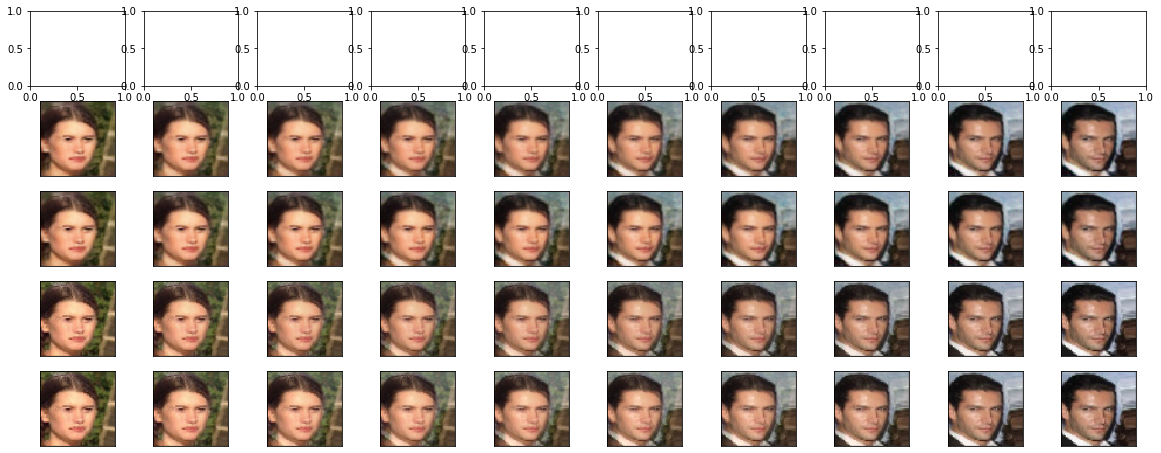

In [15]:
test_image1=train_generator[2][0][12].astype(np.float).reshape(1,64,64,3)
test_image2=train_generator[3][0][12].astype(np.float).reshape(1,64,64,3)
encoded_img1=encoder.predict(test_image1)
encoded_img2=encoder.predict(test_image2)
interpolated_images=interpolate_points(encoded_img1.flatten(),encoded_img2.flatten())
interpolated_orig_images=interpolate_points(test_image1.flatten(),test_image2.flatten())
interpolated_slerp_images=interpolate_points_slerp(encoded_img1.flatten(),encoded_img2.flatten())
interpolated_slerp_orig_images=interpolate_points_slerp(test_image1.flatten(),test_image2.flatten())

interpolated_images.shape
num_images = 10
np.random.seed(42)
plt.figure(figsize=(20, 8))

for i, image_idx in enumerate(interpolated_images):
    
    ax = plt.subplot(5, num_images, i + 1)
#     plt.imshow(interpolated_images[i].reshape(16, 8))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(5, num_images,num_images+ i + 1)
    plt.imshow(decoder.predict(interpolated_images[i].reshape(1,692224)).reshape(64,64,3))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(5, num_images,2*num_images+ i + 1)
    plt.imshow(decoder.predict(interpolated_slerp_images[i].reshape(1,692224)).reshape(64,64,3))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(5, num_images,3*num_images+ i + 1)
    plt.imshow(interpolated_orig_images[i].reshape(64,64,3))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(5, num_images,4*num_images+ i + 1)
    plt.imshow(interpolated_slerp_orig_images[i].reshape(64,64,3))
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

W0811 03:29:02.725205 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


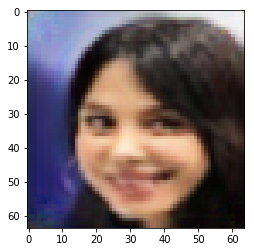

W0811 03:29:02.927614 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


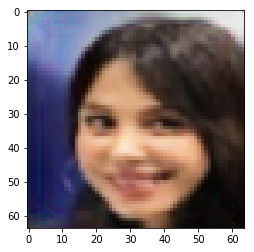

W0811 03:29:03.132067 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


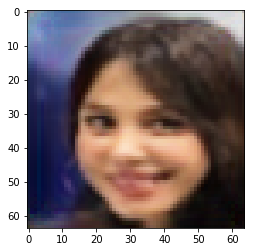

W0811 03:29:03.350485 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


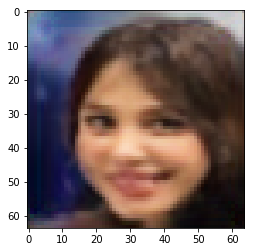

W0811 03:29:03.569361 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


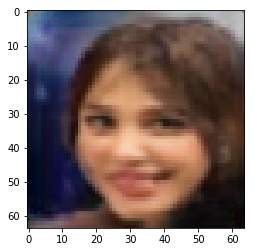

W0811 03:29:03.796719 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


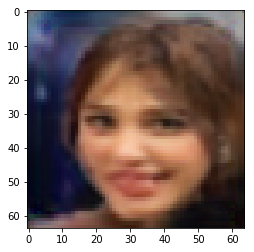

W0811 03:29:04.007158 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


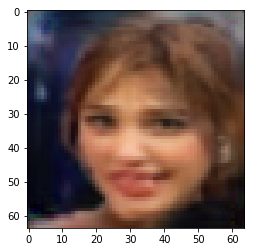

W0811 03:29:04.229485 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


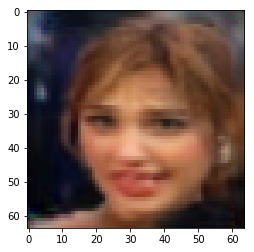

W0811 03:29:04.446717 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


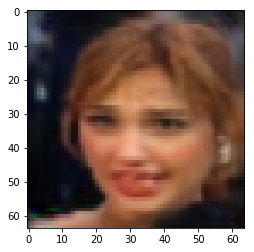

W0811 03:29:04.655154 21856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


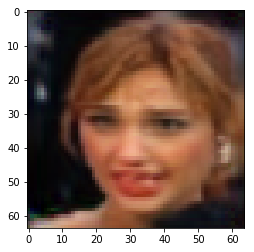

In [19]:
test_image1=train_generator[2][0][1].astype(np.float).reshape(1,64,64,3)
test_image2=train_generator[3][0][1].astype(np.float).reshape(1,64,64,3)
encoded_img1=encoder.predict(test_image1)
encoded_img2=encoder.predict(test_image2)
interpolated_images=interpolate_points(encoded_img1.flatten(),encoded_img2.flatten())
interpolated_orig_images=interpolate_points(test_image1.flatten(),test_image2.flatten())
interpolated_slerp_images=interpolate_points_slerp(encoded_img1.flatten(),encoded_img2.flatten())
interpolated_slerp_orig_images=interpolate_points_slerp(test_image1.flatten(),test_image2.flatten())

interpolated_images.shape
num_images = 10
np.random.seed(42)
# plt.figure(figsize=(20, 8))

for i, image_idx in enumerate(interpolated_images):
    
#     ax = plt.subplot(5, num_images, i + 1)
# #     plt.imshow(interpolated_images[i].reshape(16, 8))
# #     plt.gray()
# #     ax.get_xaxis().set_visible(False)
# #     ax.get_yaxis().set_visible(False)
    
#     ax = plt.subplot(5, num_images,num_images+ i + 1)
    plt.imshow(decoder.predict(interpolated_images[i].reshape(1,692224)).reshape(64,64,3))
    plt.savefig("./gif_interp/{}.jpg".format(i))
    plt.savefig("./gif_interp/{}.jpg".format(19-i))
    plt.show()
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
    
#     ax.get_yaxis().set_visible(False)
#     ax = plt.subplot(5, num_images,2*num_images+ i + 1)
#     plt.imshow(decoder.predict(interpolated_slerp_images[i].reshape(1,692224)).reshape(64,64,3))
# #     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
    
#     ax = plt.subplot(5, num_images,3*num_images+ i + 1)
#     plt.imshow(interpolated_orig_images[i].reshape(64,64,3))
# #     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
    
#     ax = plt.subplot(5, num_images,4*num_images+ i + 1)
#     plt.imshow(interpolated_slerp_orig_images[i].reshape(64,64,3))
# #     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()